# Generate images of clothing with simple GAN

In [1]:
import torch
import torchvision
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [2]:
def show_tensor_images(image_tensor, num_images=36, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

## Generator

In [3]:
def get_generator_block(input_dim, output_dim):

    return nn.Sequential(

        nn.Linear(input_dim, output_dim),
        nn.BatchNorm1d(output_dim),
        nn.ReLU(inplace=True),

    )

In [4]:
class Generator(nn.Module):

    def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
        super(Generator, self).__init__()

        self.gen = nn.Sequential(
            get_generator_block(z_dim, hidden_dim),
            get_generator_block(hidden_dim, hidden_dim * 2),
            get_generator_block(hidden_dim * 2, hidden_dim * 4),
            get_generator_block(hidden_dim * 4, hidden_dim * 8),

            nn.Linear(hidden_dim * 8, im_dim),
            nn.Sigmoid()

        )
    def forward(self, noise):
        return self.gen(noise)


    def get_gen(self):
        return self.gen

In [5]:
def get_noise(n_samples, z_dim, device='cpu'):
    noise = torch.randn(n_samples,z_dim,device=device)
    return noise

# discriminator

In [6]:

def get_discriminator_block(input_dim, output_dim):
    return nn.Sequential(
        nn.Linear(input_dim, output_dim),
        nn.LeakyReLU(0.2, inplace=True)
    )

In [7]:

class Discriminator(nn.Module):

    def __init__(self, im_dim=784, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            get_discriminator_block(im_dim, hidden_dim * 4),
            get_discriminator_block(hidden_dim * 4, hidden_dim * 2),
            get_discriminator_block(hidden_dim * 2, hidden_dim),

            nn.Linear(hidden_dim, 1)
        )

    def forward(self, image):
        return self.disc(image)


    def get_disc(self):
        return self.disc

In [8]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 100
z_dim = 64
display_step = 5000
batch_size = 128
lr = 0.00001
device = 'cpu'

In [ ]:
dataloader = DataLoader(
    torchvision.datasets.FashionMNIST('./data', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)

In [10]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [11]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):

    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake.detach())
    disc_fake_loss = criterion(disc_fake_pred, torch.zeros_like(disc_fake_pred))
    disc_real_pred = disc(real)
    disc_real_loss = criterion(disc_real_pred, torch.ones_like(disc_real_pred))
    disc_loss = (disc_fake_loss + disc_real_loss) / 2

    return disc_loss

In [12]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):

    fake_noise = get_noise(num_images, z_dim, device=device)
    fake = gen(fake_noise)
    disc_fake_pred = disc(fake)
    gen_loss = criterion(disc_fake_pred, torch.ones_like(disc_fake_pred))

    return gen_loss

0


  0%|          | 0/469 [00:00<?, ?it/s]

1


  0%|          | 0/469 [00:00<?, ?it/s]

2


  0%|          | 0/469 [00:00<?, ?it/s]

3


  0%|          | 0/469 [00:00<?, ?it/s]

4


  0%|          | 0/469 [00:00<?, ?it/s]

5


  0%|          | 0/469 [00:00<?, ?it/s]

6


  0%|          | 0/469 [00:00<?, ?it/s]

7


  0%|          | 0/469 [00:00<?, ?it/s]

8


  0%|          | 0/469 [00:00<?, ?it/s]

9


  0%|          | 0/469 [00:00<?, ?it/s]

10


  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 1.3873830516457564, discriminator loss: 0.385900032854081


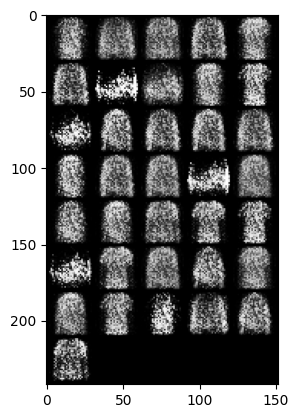

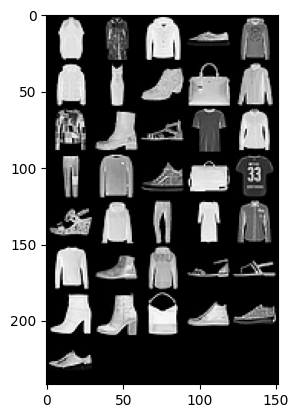

11


  0%|          | 0/469 [00:00<?, ?it/s]

12


  0%|          | 0/469 [00:00<?, ?it/s]

13


  0%|          | 0/469 [00:00<?, ?it/s]

14


  0%|          | 0/469 [00:00<?, ?it/s]

15


  0%|          | 0/469 [00:00<?, ?it/s]

16


  0%|          | 0/469 [00:00<?, ?it/s]

17


  0%|          | 0/469 [00:00<?, ?it/s]

18


  0%|          | 0/469 [00:00<?, ?it/s]

19


  0%|          | 0/469 [00:00<?, ?it/s]

20


  0%|          | 0/469 [00:00<?, ?it/s]

21


  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 1.7203992862701385, discriminator loss: 0.34345288162827514


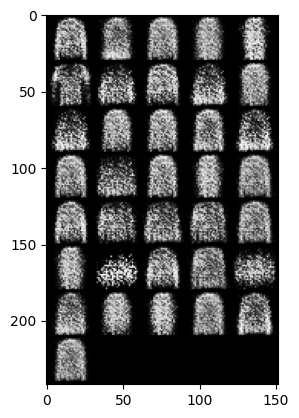

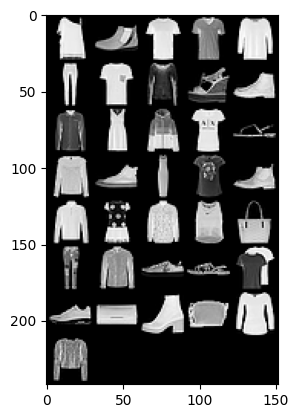

22


  0%|          | 0/469 [00:00<?, ?it/s]

23


  0%|          | 0/469 [00:00<?, ?it/s]

24


  0%|          | 0/469 [00:00<?, ?it/s]

25


  0%|          | 0/469 [00:00<?, ?it/s]

26


  0%|          | 0/469 [00:00<?, ?it/s]

27


  0%|          | 0/469 [00:00<?, ?it/s]

28


  0%|          | 0/469 [00:00<?, ?it/s]

29


  0%|          | 0/469 [00:00<?, ?it/s]

30


  0%|          | 0/469 [00:00<?, ?it/s]

31


  0%|          | 0/469 [00:00<?, ?it/s]

Step 15000: Generator loss: 1.6173442092418664, discriminator loss: 0.3871888670623303


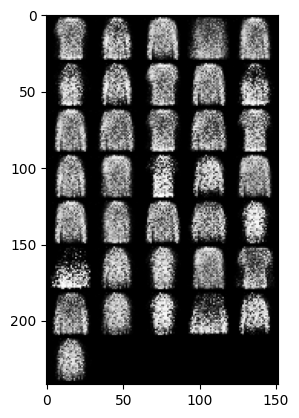

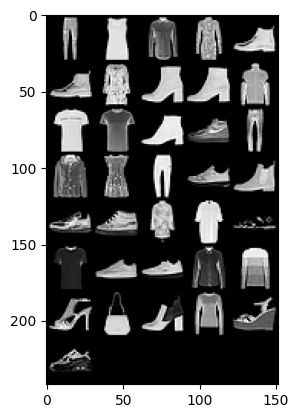

32


  0%|          | 0/469 [00:00<?, ?it/s]

33


  0%|          | 0/469 [00:00<?, ?it/s]

34


  0%|          | 0/469 [00:00<?, ?it/s]

35


  0%|          | 0/469 [00:00<?, ?it/s]

36


  0%|          | 0/469 [00:00<?, ?it/s]

37


  0%|          | 0/469 [00:00<?, ?it/s]

38


  0%|          | 0/469 [00:00<?, ?it/s]

39


  0%|          | 0/469 [00:00<?, ?it/s]

40


  0%|          | 0/469 [00:00<?, ?it/s]

41


  0%|          | 0/469 [00:00<?, ?it/s]

42


  0%|          | 0/469 [00:00<?, ?it/s]

Step 20000: Generator loss: 1.5557489407777756, discriminator loss: 0.4025815287947662


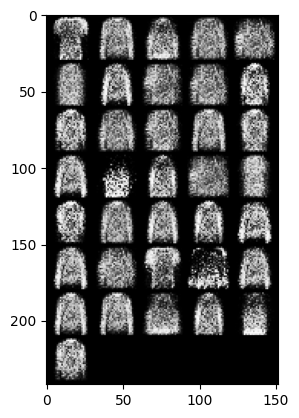

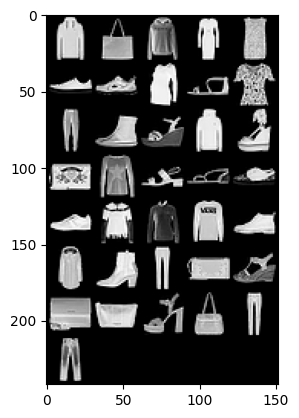

43


  0%|          | 0/469 [00:00<?, ?it/s]

44


  0%|          | 0/469 [00:00<?, ?it/s]

45


  0%|          | 0/469 [00:00<?, ?it/s]

46


  0%|          | 0/469 [00:00<?, ?it/s]

47


  0%|          | 0/469 [00:00<?, ?it/s]

48


  0%|          | 0/469 [00:00<?, ?it/s]

49


  0%|          | 0/469 [00:00<?, ?it/s]

50


  0%|          | 0/469 [00:00<?, ?it/s]

51


  0%|          | 0/469 [00:00<?, ?it/s]

52


  0%|          | 0/469 [00:00<?, ?it/s]

53


  0%|          | 0/469 [00:00<?, ?it/s]

Step 25000: Generator loss: 1.433003264713282, discriminator loss: 0.4353729184269908


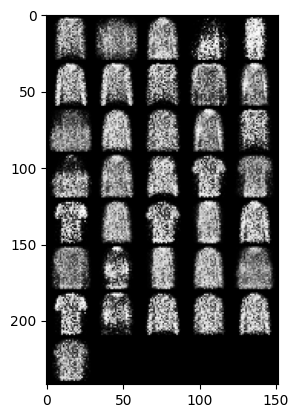

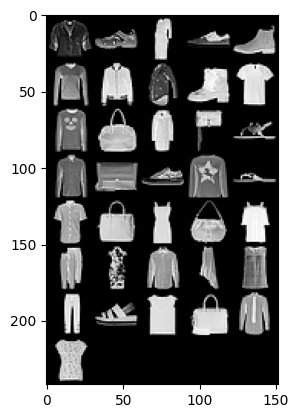

54


  0%|          | 0/469 [00:00<?, ?it/s]

55


  0%|          | 0/469 [00:00<?, ?it/s]

56


  0%|          | 0/469 [00:00<?, ?it/s]

57


  0%|          | 0/469 [00:00<?, ?it/s]

58


  0%|          | 0/469 [00:00<?, ?it/s]

59


  0%|          | 0/469 [00:00<?, ?it/s]

60


  0%|          | 0/469 [00:00<?, ?it/s]

61


  0%|          | 0/469 [00:00<?, ?it/s]

62


  0%|          | 0/469 [00:00<?, ?it/s]

63


  0%|          | 0/469 [00:00<?, ?it/s]

Step 30000: Generator loss: 1.3294992186784726, discriminator loss: 0.45265625000596077


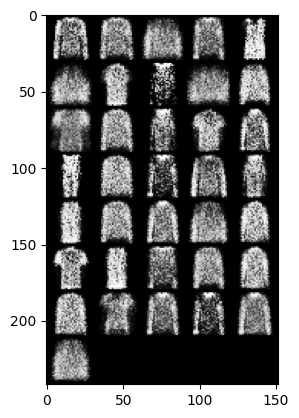

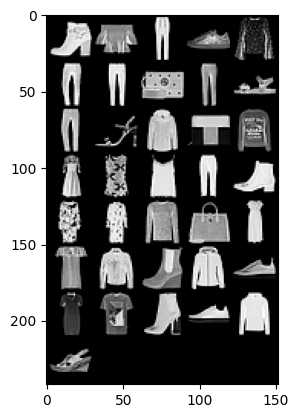

64


  0%|          | 0/469 [00:00<?, ?it/s]

65


  0%|          | 0/469 [00:00<?, ?it/s]

66


  0%|          | 0/469 [00:00<?, ?it/s]

67


  0%|          | 0/469 [00:00<?, ?it/s]

68


  0%|          | 0/469 [00:00<?, ?it/s]

69


  0%|          | 0/469 [00:00<?, ?it/s]

70


  0%|          | 0/469 [00:00<?, ?it/s]

71


  0%|          | 0/469 [00:00<?, ?it/s]

72


  0%|          | 0/469 [00:00<?, ?it/s]

73


  0%|          | 0/469 [00:00<?, ?it/s]

74


  0%|          | 0/469 [00:00<?, ?it/s]

Step 35000: Generator loss: 1.247069295632844, discriminator loss: 0.46611023311614985


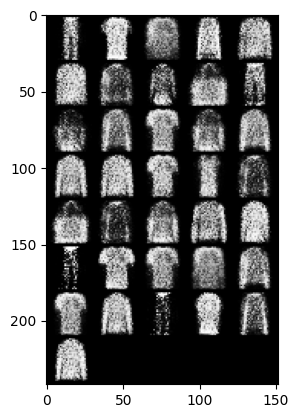

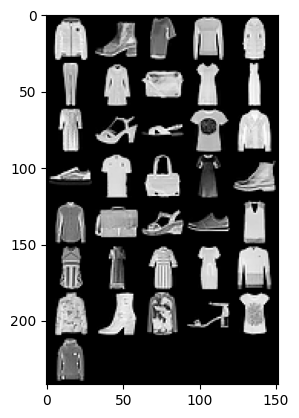

75


  0%|          | 0/469 [00:00<?, ?it/s]

76


  0%|          | 0/469 [00:00<?, ?it/s]

77


  0%|          | 0/469 [00:00<?, ?it/s]

78


  0%|          | 0/469 [00:00<?, ?it/s]

79


  0%|          | 0/469 [00:00<?, ?it/s]

80


  0%|          | 0/469 [00:00<?, ?it/s]

81


  0%|          | 0/469 [00:00<?, ?it/s]

82


  0%|          | 0/469 [00:00<?, ?it/s]

83


  0%|          | 0/469 [00:00<?, ?it/s]

84


  0%|          | 0/469 [00:00<?, ?it/s]

85


  0%|          | 0/469 [00:00<?, ?it/s]

Step 40000: Generator loss: 1.114432960915566, discriminator loss: 0.5002106753230103


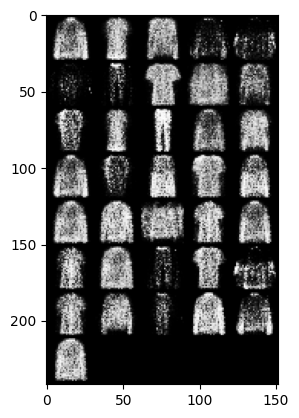

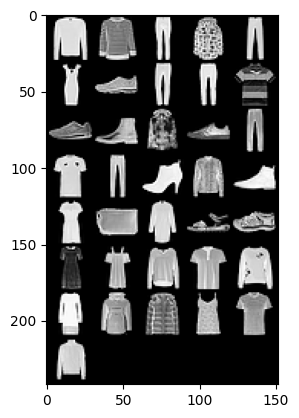

86


  0%|          | 0/469 [00:00<?, ?it/s]

87


  0%|          | 0/469 [00:00<?, ?it/s]

88


  0%|          | 0/469 [00:00<?, ?it/s]

89


  0%|          | 0/469 [00:00<?, ?it/s]

90


  0%|          | 0/469 [00:00<?, ?it/s]

91


  0%|          | 0/469 [00:00<?, ?it/s]

92


  0%|          | 0/469 [00:00<?, ?it/s]

93


  0%|          | 0/469 [00:00<?, ?it/s]

94


  0%|          | 0/469 [00:00<?, ?it/s]

95


  0%|          | 0/469 [00:00<?, ?it/s]

Step 45000: Generator loss: 1.0219372553586965, discriminator loss: 0.5381569406688222


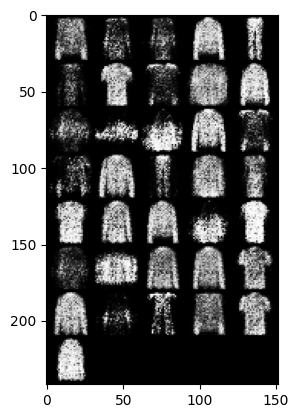

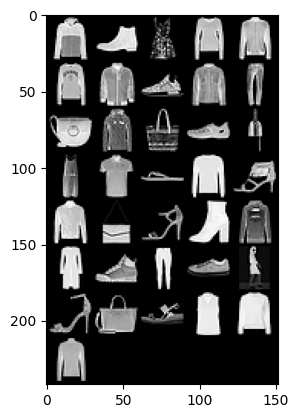

96


  0%|          | 0/469 [00:00<?, ?it/s]

97


  0%|          | 0/469 [00:00<?, ?it/s]

98


  0%|          | 0/469 [00:00<?, ?it/s]

99


  0%|          | 0/469 [00:00<?, ?it/s]

In [17]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0
test_generator = True # Whether the generator should be tested
gen_loss = False
error = False
for epoch in range(n_epochs):
    print(epoch)
    for real, _ in tqdm(dataloader):
        cur_batch_size = len(real)

        real = real.view(cur_batch_size, -1).to(device)


        disc_opt.zero_grad()

        disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)

        disc_loss.backward(retain_graph=True)

        disc_opt.step()

        if test_generator:
            old_generator_weights = gen.gen[0][0].weight.detach().clone()

        gen_opt.zero_grad()
        gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
        gen_loss.backward()
        gen_opt.step()

        if test_generator:
            try:
                assert lr > 0.0000002 or (gen.gen[0][0].weight.grad.abs().max() < 0.0005 and epoch == 0)
                assert torch.any(gen.gen[0][0].weight.detach().clone() != old_generator_weights)
            except:
                error = True
                print("Runtime tests have failed")

        mean_discriminator_loss += disc_loss.item() / display_step

        mean_generator_loss += gen_loss.item() / display_step

        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = get_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1


In [21]:
gen.load_state_dict(torch.load("./weights-100-epochs/Gen.pth" , map_location=torch.device('cpu')))
gen.eval()

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=128, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): Linear(in_features=512, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Sigmoid()
  )
)

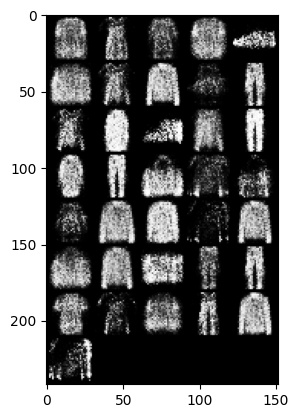

In [31]:
noise = get_noise(36 , z_dim)
imgs = gen(noise)
show_tensor_images(imgs)